기술 통계

- Numerical descriptive statistics
- 데이터 변형,재구조화 Reshape
- 참고)Graphical descriptive statistics#2/2

In [5]:
#
import pandas as pd
타이타닉=pd.read_csv('../Datasets/titanic_train.csv')
타이타닉.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Numerical descriptive statistics

Aggregation 함수(min, max, sum, count 등) 사용

판다스는 기본적으로 결측값 NaN(Not a Number, None)을 제외하고 계산됨

## Measures of central tendency 중심 경향 척도-mean median mode

### - mean()
NaN을 제외한 평균

### - median()
NaN을 제외한 중앙값

### - mode()
NaN을 제외한 최빈값

## Measures of variability/dispersion 변동성 척도-분산 표편 사분위수 변동계수

In [85]:
# 타이타닉=pd.read_csv('../Datasets/titanic_train.csv')

### var()
NaN을 제외한 분산

### std()
NaN을 제외한 표준 편차

### quantile() 백분위수

NaN을 제외한 표준 편차

q. 타이타닉의 Age의 85백분위수는?

- 참고) 사용자 정의함수

In [89]:
#
def calculate_quantile(data, q):
    sorted_data = sorted(data.dropna())  # 데이터를 리스트로 정렬합니다.
    index = (len(sorted_data) - 1) * q  # 분위수에 해당하는 인덱스를 계산합니다. #7.6499 파이썬은 0부터 시작
    floor = int(index // 1)  # 분위수에 해당하는 인덱스의 정수 부분을 가져옵니다. #7
    ceil = int(index // 1 + 1)  # 분위수에 해당하는 인덱스의 올림 값을 가져옵니다. #8
    fraction = index % 1  # 분위수에 해당하는 인덱스의 소수 부분을 가져옵니다. #0.649
    
    if floor == ceil:  # 분위수에 해당하는 인덱스가 정수인 경우
        quantile_value = sorted_data[floor]
    else:  # 분위수에 해당하는 인덱스가 정수가 아닌 경우
        quantile_value = sorted_data[floor] + (sorted_data[ceil]-sorted_data[floor])*fraction

    return quantile_value

In [90]:
calculate_quantile(타이타닉.Age, 0.85)

45.0

- 대략적으로 구하기

In [92]:
#
t=pd.Series([4]*10+[1]*20+[3]*20+[10]*40).sort_values()
print(list(pd.Series([4]*10+[1]*20+[3]*20+[10]*40).sort_values()))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


> 데이터가 많아지면 앞뒤로 다 같은 숫자일 확률이 무지 높다. 이걸 이용해보자

q. 타이타닉의 Age의 85백분위수는? quantile함수을 잊어버렸다고 가정하고 빨리 풀어보자

# datasets 13 - 2

## Q2 두번째 조건까지만 풀어봅시다

## Measure of association 연관성 척도- 공분산 상관계수

### cov()

### corr()
- NaN을 제외한 상관계수
- 피어슨(Pearson) 상관계수

q. 타이타닉 데이터에서 생존여부에 대한 상관분석을 하시오. 가장 큰 상관관계를 가진 변수는?

## Measures of Shape 모양 척도 - 왜도 첨도

q. 타이타닉의 Fare의 왜도 값을 쓰세요

### skew()
왜도

### kurt()
첨도

## 데이터 요약

In [114]:
#
타이타닉=pd.read_csv('../Datasets/titanic_train.csv')
타이타닉.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

### - sum
NaN을 제외한 합

q. 타이타닉[['SibSp','Parch']]에서 element가 1인 데이터를 축에 따라 합을 각각 구해보아라

Q.
SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수  
Parch : 동반한 Parent(부모) Child(자식)의 수  
두 변수 중에 하나라도 동반자가 없는 유람선 승객수는?
ex) SibSp=0 Parch=1 -> 카운트 1

Q. 남자 중 생존한 확률을 소수 둘째자리까지 표시하라(소수 셋째자리에서 반올림), crosstab,len 사용하지 말고 sum을 이용해서 구하라

In [3]:
import pandas as pd

<Axes: ylabel='Sex'>

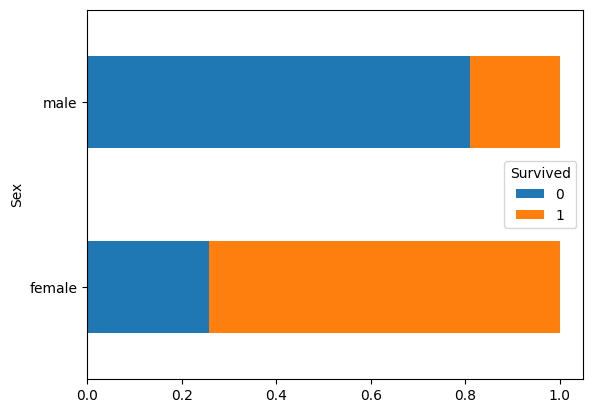

In [6]:
#
타이타닉_생존=pd.crosstab(타이타닉.Sex, 타이타닉.Survived, normalize='index')
타이타닉_생존.plot.barh(stacked=True)

In [128]:
#
len(타이타닉[타이타닉.Sex=='male'])
# 타이타닉[타이타닉.Sex=='male'].shape[0]

577

In [133]:
# len으로 푸는 법
# len(타이타닉.loc[(타이타닉.Sex=='male')&(타이타닉.Survived==1)])/len(타이타닉.loc[타이타닉.Sex=='male'])

### - count()
NaN 값을 제외한 원소의 개수 

q. count,info 함수를 사용하지 않고 Cabin의 결측치가 제외된 행의 수인 204가 나오게 하시오. 5m

## 그룹 함수 groupby

- 평균

- 여러 변수

- 분산

q. 호불호가 극명하게 나뉘는 영화를 찾아보자.  3m

In [23]:
#
영화 = pd.DataFrame(
    {'title' : ['인터스텔라', '인터스텔라', '인터스텔라', '반지의제왕','반지의제왕','반지의제왕','반지의제왕'],
    'rating': [60, 80, 40, 100, 90, 80, 90]})
영화

title  rating
0  인터스텔라      60
1  인터스텔라      80
2  인터스텔라      40
3  반지의제왕     100
4  반지의제왕      90
5  반지의제왕      80
6  반지의제왕      90

### a. 인터스텔라    

- 그룹바이에 함수 적용

q. title기준으로 그룹을 지정한 후 각 그룹내의 개수를 구하라. hint: 영화.groupby('title').apply(함수)

## q. Dataset 6-1 groupby로 풀어보시오

In [149]:
#
df= pd.read_csv('../Datasets/Dataset_06.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  2597000006  20150309T000000  347500.0         3       1.50         1180   
1  8813400345  20150414T000000  575000.0         2       1.00          980   
2   226059106  20150102T000000  489500.0         3       1.75         2090   
3  8645500270  20141028T000000  246000.0         4       1.75         1720   
4  7010700550  20141114T000000  595000.0         3       2.50         2030   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8353     1.0           0     0          3      7        1180   
1      3663     1.0           0     0          5      7         980   
2     65558     1.0           0     0          3      8        1330   
3      7455     1.0           0     0          4      7        1020   
4      5100     2.0           0     0          3      7        2030   

   sqft_basement  yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  
0              0      1960             0    98155           1710        8748  
1              0      1909             0    98105           1620        3706  
2            760      1977             0    98072           2450       47178  
3            700      1963             0    98058           1720        7700  
4              0      2008             0    98199           1790        4380

## q. Dataset 04 - 1번

## q. DataSet_08 -1

# 데이터 변형,재구조화 Reshape

## 피벗

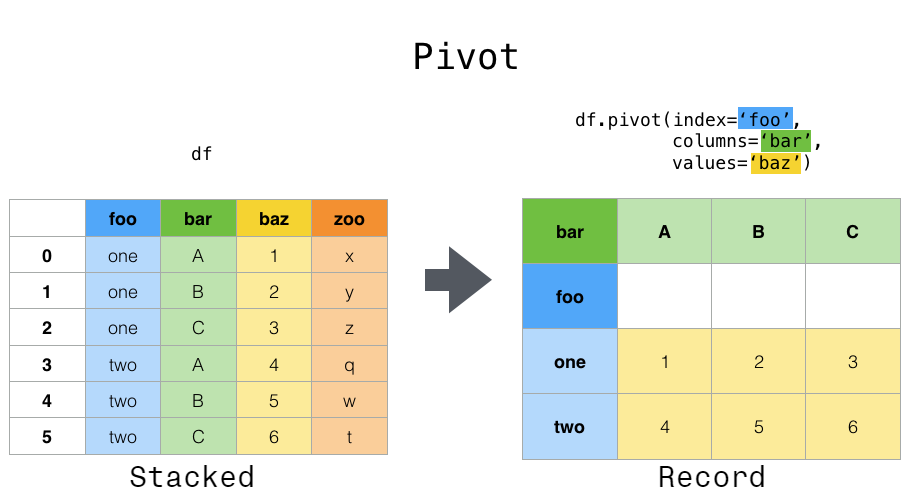

- `index` : 피봇테이블에서 index 로 설정할 컬럼명
- `columns` : 피봇테이블에서 colum 으로 설정할 컬럼명
- `values` : 데이터를 구성하는 값

In [170]:
#
data = {
    "value": range(12),
       "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
       "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}

df = pd.DataFrame(data)
df.head()

value variable       date
0      0        A 2020-01-03
1      1        A 2020-01-04
2      2        A 2020-01-05
3      3        B 2020-01-03
4      4        B 2020-01-04

- 똑같은 데이터가 여러개 있으면 에러발생  
ValueError: Index contains duplicate entries, cannot reshape

# datasets 11 - 2번

In [172]:
# df = pd.read_csv("world_happiness_score.csv")
df = pd.read_csv("../Datasets/Dataset_11.csv")
df.head(2)

Country  Happiness_Rank  Happiness_Score  year
0  Switzerland               1            7.587  2015
1      Iceland               2            7.561  2015

## 피벗 테이블

피벗 vs. 피벗 테이블
--> pivot_table 은 agg(aggregate,집합) function 사용가능

- `values` : 데이터를 구성하는 값
- `index` : 피봇테이블에서 index 로 설정할 컬럼명
- `columns` : 피봇테이블에서 colum 으로 설정할 컬럼명
- `aggfunc` : 연산 기능
- 파라미터가 안들어가도 됨 columns=None

In [176]:
#
import numpy as np

df = pd.DataFrame(
    {
        "group": ["one", "one", "one", "two", "two", "three"] ,
        "sex": ["m", "f", "f", "m", "f", "f"] ,
        "D": np.arange(6),        
    }
)
df

group sex  D
0    one   m  0
1    one   f  1
2    one   f  2
3    two   m  3
4    two   f  4
5  three   f  5

## q. Dataset 04 - 1번

q. 앞에서 그룹바이로 풀었던 문제를 피벗 테이블을 이용해서 풀어보세요.

In [10]:
#
df = pd.read_csv('../Datasets/Dataset_04.csv')
df = df[df.LOCATION=='KOR']
df.head()

LOCATION SUBJECT  TIME     Value
442      KOR    BEEF  1991  5.085481
443      KOR    BEEF  1992  5.685434
444      KOR    BEEF  1993  5.325765
445      KOR    BEEF  1994  5.698819
446      KOR    BEEF  1995  6.568429

In [11]:
#
#기존 그룹바이 방법
time_groupby=df.groupby('TIME')['Value'].sum()
time_groupby.head()

TIME
1990     5.774255
1991    21.911207
1992    26.901769
1993    26.938255
1994    27.877341
Name: Value, dtype: float64

# 참고)Graphical descriptive statistics#2/2

## 이상치

In [9]:
#
점수 = pd.DataFrame(
    {'math' : [55, 73, 100, 90, 85, 62,150]})

## 박스 플랏

### plot.box()

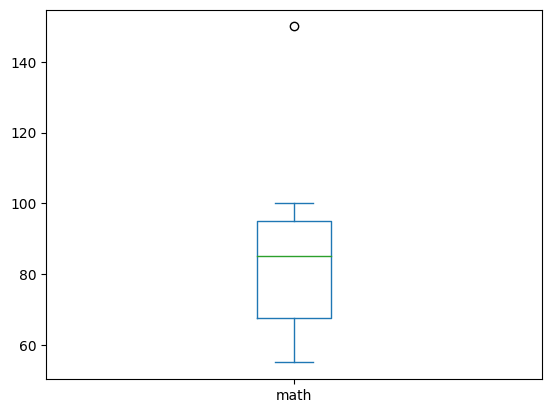

In [10]:
점수.plot.box();

q. 타이타닉 데이터에서 Fare에서 극명하게 이상치로 보이는 행들을 탐색하시오 3m

<Axes: >

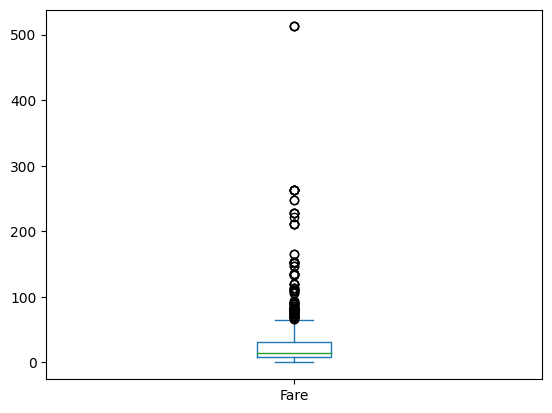

In [184]:
타이타닉['Fare'].plot.box()